<a href="https://colab.research.google.com/github/bhardwajshivam/Optimizing-Order-Execution-Strategy-for-HFT/blob/main/Data_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf

def collect_stock_data(symbol, start_date, end_date):
    """
    Collects historical stock price data for a given symbol and date range.

    Parameters:
        symbol (str): The stock symbol (e.g., AAPL for Apple Inc.).
        start_date (str): The start date in the format 'YYYY-MM-DD'.
        end_date (str): The end date in the format 'YYYY-MM-DD'.

    Returns:
        pandas.DataFrame: DataFrame containing historical stock price data.
    """
    try:
        # Fetch historical data from Yahoo Finance API
        stock_data = yf.download(symbol, start=start_date, end=end_date)
        return stock_data
    except Exception as e:
        print(f"Error: Unable to fetch data for {symbol}. Error Message: {str(e)}")
        return None

# Example usage:
symbol = "AAPL"
start_date = "2013-08-01"
end_date = "2023-08-01"

stock_data = collect_stock_data(symbol, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-08-01,16.276787,16.314285,16.187857,16.309999,14.141198,206250800
2013-08-02,16.357500,16.530357,16.309286,16.519285,14.322656,274783600
2013-08-05,16.596071,16.809643,16.505358,16.766071,14.536627,318855600
2013-08-06,16.715000,16.853214,16.506071,16.616072,14.406571,334857600
2013-08-07,16.564285,16.678572,16.491785,16.606428,14.398209,298858000


In [4]:
data = stock_data[['Open','Close']]
data

,Open,Close
Date,,
2013-08-01,16.276787,16.309999
2013-08-02,16.357500,16.519285
2013-08-05,16.596071,16.766071
2013-08-06,16.715000,16.616072
2013-08-07,16.564285,16.606428
...,...,...
2023-07-25,193.330002,193.619995
2023-07-26,193.669998,194.500000
2023-07-27,196.020004,193.220001


In [5]:
import matplotlib.pyplot as plt

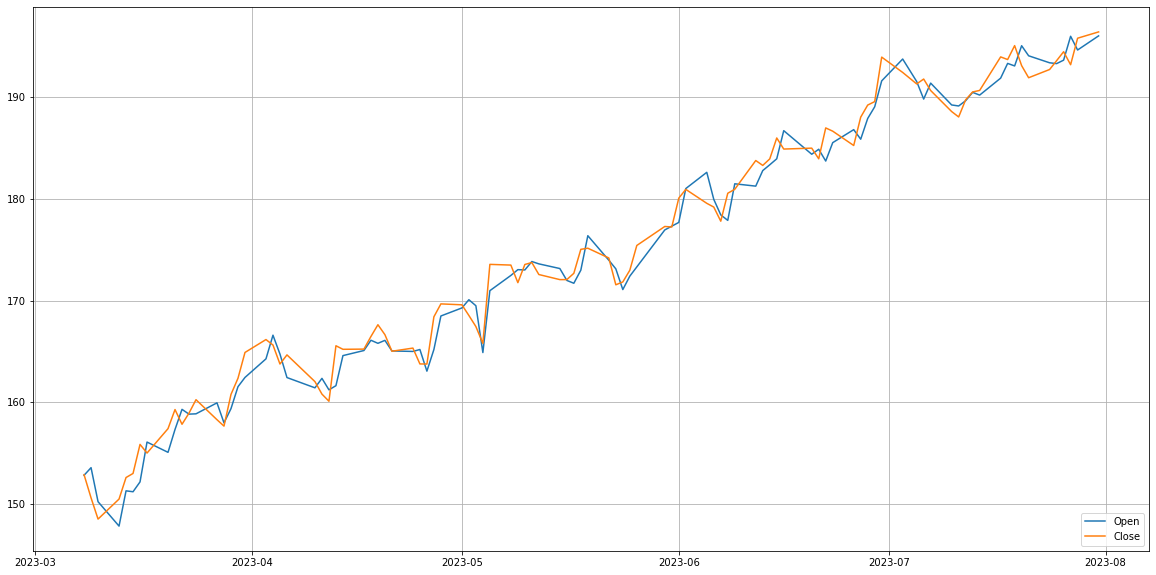

In [6]:
plt.figure(figsize=(20, 10))
plt.plot(data['Open'][-100:])
plt.plot(data['Close'][-100:])
plt.grid(True)
plt.legend(["Open", "Close"], loc ="lower right")
plt.show()

In [7]:
short = []
for i in range(len(data)):
    if data['Open'][i] > data['Close'][i]:
        short.append(1)
    else:
        short.append(0)

data['short'] = short
data

<ipython-input-7-5384a041fcbd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['short'] = short


,Open,Close,short
Date,,,
2013-08-01,16.276787,16.309999,0
2013-08-02,16.357500,16.519285,0
2013-08-05,16.596071,16.766071,0
2013-08-06,16.715000,16.616072,1
2013-08-07,16.564285,16.606428,0
...,...,...,...
2023-07-25,193.330002,193.619995,0
2023-07-26,193.669998,194.500000,0
2023-07-27,196.020004,193.220001,1


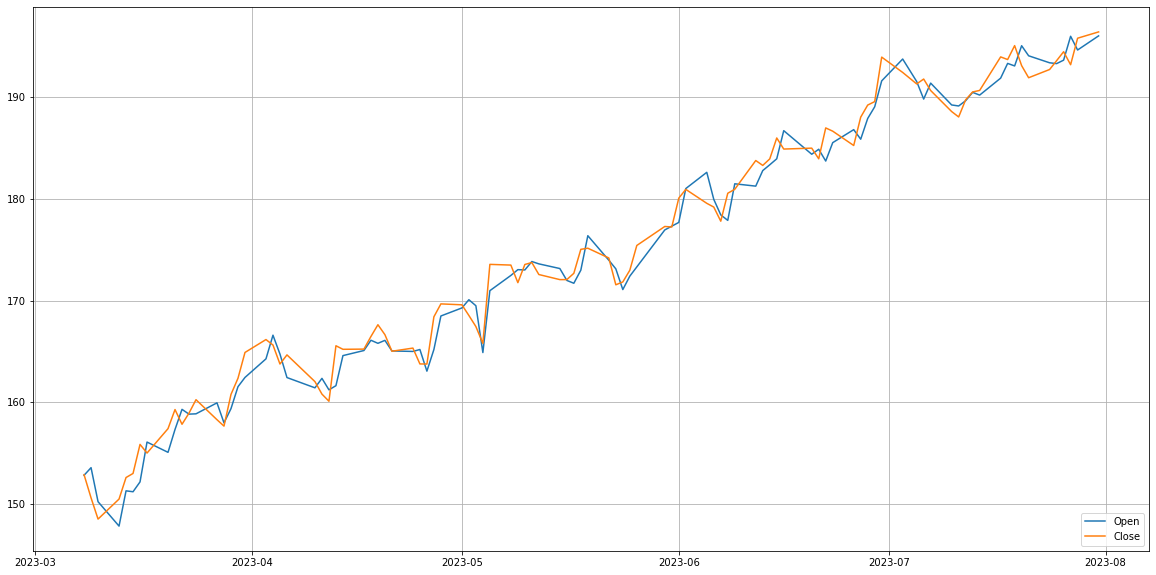

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(data['Open'][-100:])
plt.plot(data['Close'][-100:])
#plt.plot(s[-100:],marker='o')
plt.grid(True)
plt.legend(["Open", "Close"], loc ="lower right")
plt.show()

In [9]:
data["lag1"] = data['Close'].shift(periods=1)
data["lag2"] = data['Close'].shift(periods=2)
data["lag3"] = data['Close'].shift(periods=3)
data["lag4"] = data['Close'].shift(periods=4)
data["lag5"] = data['Close'].shift(periods=5)
data

<ipython-input-9-80bdf2b5b689>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lag1"] = data['Close'].shift(periods=1)
<ipython-input-9-80bdf2b5b689>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lag2"] = data['Close'].shift(periods=2)


,Open,Close,short,lag1,lag2,lag3,lag4,lag5
Date,,,,,,,,
2013-08-01,16.276787,16.309999,0,NaN,NaN,NaN,NaN,NaN
2013-08-02,16.357500,16.519285,0,16.309999,NaN,NaN,NaN,NaN
2013-08-05,16.596071,16.766071,0,16.519285,16.309999,NaN,NaN,NaN
2013-08-06,16.715000,16.616072,1,16.766071,16.519285,16.309999,NaN,NaN
2013-08-07,16.564285,16.606428,0,16.616072,16.766071,16.519285,16.309999,NaN
...,...,...,...,...,...,...,...,...
2023-07-25,193.330002,193.619995,0,192.750000,191.940002,193.130005,195.100006,193.729996
2023-07-26,193.669998,194.500000,0,193.619995,192.750000,191.940002,193.130005,195.100006
2023-07-27,196.020004,193.220001,1,194.500000,193.619995,192.750000,191.940002,193.130005


In [10]:
data.dropna(inplace = True)
data

,Open,Close,short,lag1,lag2,lag3,lag4,lag5
Date,,,,,,,,
2013-08-08,16.566429,16.464643,1,16.606428,16.616072,16.766071,16.519285,16.309999
2013-08-09,16.379999,16.230356,1,16.464643,16.606428,16.616072,16.766071,16.519285
2013-08-12,16.316429,16.691429,0,16.230356,16.464643,16.606428,16.616072,16.766071
2013-08-13,16.819286,17.484644,0,16.691429,16.230356,16.464643,16.606428,16.616072
2013-08-14,17.781429,17.803572,0,17.484644,16.691429,16.230356,16.464643,16.606428
...,...,...,...,...,...,...,...,...
2023-07-25,193.330002,193.619995,0,192.750000,191.940002,193.130005,195.100006,193.729996
2023-07-26,193.669998,194.500000,0,193.619995,192.750000,191.940002,193.130005,195.100006
2023-07-27,196.020004,193.220001,1,194.500000,193.619995,192.750000,191.940002,193.130005


In [11]:
data.corr()

,Open,Close,short,lag1,lag2,lag3,lag4,lag5
Open,1.000000,0.999671,-0.006814,0.999828,0.999331,0.998881,0.998499,0.998131
Close,0.999671,1.000000,-0.021735,0.999501,0.999055,0.998639,0.998246,0.997863
short,-0.006814,-0.021735,1.000000,-0.006443,-0.007769,-0.007760,-0.007591,-0.007906
lag1,0.999828,0.999501,-0.006443,1.000000,0.999500,0.999054,0.998637,0.998243
lag2,0.999331,0.999055,-0.007769,0.999500,1.000000,0.999500,0.999052,0.998635
lag3,0.998881,0.998639,-0.007760,0.999054,0.999500,1.000000,0.999499,0.999050
lag4,0.998499,0.998246,-0.007591,0.998637,0.999052,0.999499,1.000000,0.999498
lag5,0.998131,0.997863,-0.007906,0.998243,0.998635,0.999050,0.999498,1.000000
